<a href="https://colab.research.google.com/github/rpgit12/cs236/blob/main/AudioData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0


In [ ]:
#!pip install pygmidi
!pip install music21 --upgrade
!pip install midi2audio
!sudo apt-get install fluidsynth
!sudo apt-get install fluid-soundfont-gm
!mkdir -p ~/.fluidsynth
#!ln -s /usr/share/sounds/sf2/FluidR3_GM.sf2 ~/.fluidsynth/

#!wget https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0.zip
#!wget https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip
#!wget https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0.csv
#!wget https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0.json

!test -e /content/cs236 || ln -s /content/drive/MyDrive/cs236/project /content


     |████████████████████████████████| 19.2 MB 6.5 MB/s 
  Created wheel for music21: filename=music21-7.1.0-py3-none-any.whl size=21912606 sha256=cb33d3ca310af8dec0391bcdfdc83dde3c5857f741d049494062ee7101c50eae
  Stored in directory: /root/.cache/pip/wheels/98/3c/67/9e30a8a4c3ac934068c95d2c27e38e1b5e5016a9257dbbf5d0
Successfully built music21
  Attempting uninstall: music21
    Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 120 MB of archives.
After this operatio

In [ ]:
#import mido as m
import music21 as m21
from midi2audio import FluidSynth
import os
import glob
import pandas as pd

In [ ]:
sample_file = glob.glob('project/maestro-v3.0.0/2017/*.midi')[1]
sample_file = sample_file[len('project/maestro-v3.0.0/'):]
sample_file

'2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-split_07-09-17_Piano-e_2_-02_wav--3.midi'

In [ ]:
FluidSynth("/usr/share/sounds/sf2/FluidR3_GM.sf2").midi_to_audio(sample, '/content/project/output.wav')


In [ ]:
mf.ticksPerSecond

In [ ]:
sample_file = '2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-split_07-09-17_Piano-e_2_-02_wav--1.midi'
mf = m21.midi.MidiFile()
mf.open(f'project/maestro-v3.0.0/{sample_file}')
mf.read()
mf.close()


In [ ]:
#rputtkammer@romans-mbp-2 2017 % soxi -d MIDI-Unprocessed_081_PIANO081_MID--AUDIO-split_07-09-17_Piano-e_2_-02_wav--1.wav 
#00:10:24.69
wav_time_sec = 10*60+24+.69

In [ ]:
midi_time_ticks = sum([ e.time for e in mf.tracks[1].events if e.isDeltaTime() ])
midi_time_ticks / wav_time_sec

# 960 ticks per second !!!


959.5671453040708

In [ ]:
mt = mf.tracks[1]
ev = mt.events[0]

assert len(mf.tracks) == 2
print("event types", set([e.type for e in mt.events]))

# speed is set by track and by SET_TEMPO meta events - not expecting these here...

print("ticksPerQuarterNote", mf.ticksPerQuarterNote)
print("ticksPerSecond", mf.ticksPerSecond)

# default bpm is 120, or 500000 ticks per min

# let's calculate total ticks for this song

track_length = [sum([e.time for e in t.events if e.isDeltaTime()]) for t in mf.tracks ]
print("Track Lengths:", track_length)

# can we assume 2 tracks, with only the second one relevant?

assert track_length[0]==1
total_ticks = track_length[1]
total_ticks

event types {<ChannelVoiceMessages.PROGRAM_CHANGE: 0xC0>, 'DeltaTime', <MetaEvents.END_OF_TRACK: 0x2F>, <ChannelVoiceMessages.NOTE_ON: 0x90>, <ChannelVoiceMessages.CONTROLLER_CHANGE: 0xB0>}
ticksPerQuarterNote 480
ticksPerSecond None
Track Lengths: [1, 544588]


544588

In [ ]:
sample_dir = "project/maestro-v3.0.0"
df = pd.read_csv(f"{sample_dir}/maestro-v3.0.0.csv")
df_rec = df[df.midi_filename == sample_file]
df_rec


,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
297,Franz Schubert,"Impromptu Op. 142 No. 1 in F Minor, D. 935",train,2017,2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-...,2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-...,566.241884


In [ ]:
# is this the right ticks per minute, or is it actually 60000

total_sec = df_rec.duration.iloc[0]
ticks_per_min = total_ticks / total_sec * 60
#ticks_per_min

beats_per_min = ticks_per_min / mf.ticksPerQuarterNote
print("ticks_per_min", ticks_per_min)
print("beats_per_min", beats_per_min)

# maybe it's actually 60000 ticks per minut and 125 beats per minute?
total_sec / 125 * 60000
# calculate ticks per beat then ...
total_ticks / total_sec * 60 / 120

# I think the files are using 120 bpm - that works out nicely
beats_per_min = 120
ticks_per_min = mf.ticksPerQuarterNote * beats_per_min
ticks_per_beat = mf.ticksPerQuarterNote
ticks_per_sec = ticks_per_min/60

ticks_per_min, beats_per_min, ticks_per_beat, ticks_per_sec

ticks_per_min 57705.51587745308
beats_per_min 120.21982474469391


(57600, 120, 480, 960.0)

In [ ]:
# let's get a random chunk from the audio & midi file

import random
import numpy as np

sample_duration_sec_minmax = np.array([2,10])

sample_duration = random.randint(*(np.minimum(sample_duration_sec_minmax, df_rec.duration.iloc[0])*ticks_per_sec).astype(np.int32))
sample_offset = random.randint(0, (int)(df_rec.duration.iloc[0]*ticks_per_sec-sample_duration))


In [ ]:

print(f"sample {sample_duration/ticks_per_sec} starting at offset {sample_offset/ticks_per_sec}")

import librosa as lr

y, sr = lr.load(f"{sample_dir}/{df_rec.audio_filename.iloc[0]}", sr=44100, mono=True, offset=sample_offset/ticks_per_sec,
                duration=sample_duration/ticks_per_sec)

import soundfile as sf

sf.write('project/sample_wav.wav', data=y, samplerate=sr, subtype='PCM_24')
!ls -l project/

sample 4.184375 starting at offset 375.2552083333333
total 100949
drwx------ 3 root root      4096 Oct 28 19:02 maestro-v3.0.0
-rw------- 1 root root 100068652 Oct 31 03:25 output.wav
-rw------- 1 root root       318 Oct 31 22:15 sample.midi
-rw------- 1 root root   1027244 Oct 31 22:24 sample_midi_to_wav.wav
-rw------- 1 root root    684844 Oct 31 22:16 sample.wav
-rw------- 1 root root    553638 Nov  3 16:10 sample_wav.wav
drwx------ 2 root root      4096 Nov  2 03:05 src
-rw------- 1 root root   1027244 Oct 31 22:23 s.wav


In [ ]:
import IPython
display(IPython.display.Audio(y, rate=sr))


In [ ]:

# looks like everything is in track 1, channel 1

ticks_start, ticks_end = sample_offset, sample_duration+sample_offset
print(f"looking for {ticks_start} to {ticks_end} with length {(ticks_end-ticks_start)/ticks_per_sec}")
time_curr, time_last_event = 0, ticks_start
samples = []
nsamples = []

nsamples.append(m21.midi.DeltaTime(track=None, time=0, channel=1))
pce = m21.midi.MidiEvent(ntrack, type=m21.midi.ChannelVoiceMessages.PROGRAM_CHANGE, channel=1)
pce.parameter1 = 0
nsamples.append(pce)

for e in mf.tracks[1].events:
    if e.isDeltaTime():
        time_curr = time_curr + e.time
        if time_curr > ticks_end:
            print("reached end", ticks_end)
            break
    else:
        assert e.time == 0
    if time_curr >= ticks_start:
        if e.type == m21.midi.ChannelVoiceMessages.NOTE_ON:

            # insert delta time
            ne = m21.midi.DeltaTime(track=None, time=time_curr-time_last_event, channel=1)
            nsamples.append(ne)

            # insert note on
            ne = m21.midi.MidiEvent(track=None, type=m21.midi.ChannelVoiceMessages.NOTE_ON, time=0, channel=1)
            ne.pitch = e.pitch
            ne.velocity = e.velocity
            ne.parameter1 = e.parameter1
            ne.parameter2 = e.parameter2
            nsamples.append(ne)

            time_last_event = time_curr

        elif e.isDeltaTime():
            pass
        elif e.type == m21.midi.ChannelVoiceMessages.CONTROLLER_CHANGE and e.parameter1 == 64:
            pass
        else:
            pass
            #print(f"warning, skipping type {e.type}")
    else:
        #print(f"skipping initial {e} at {time_curr}")
        pass

last_delta = max(ticks_end - time_last_event, 0)
nsamples.append(m21.midi.DeltaTime(track=None, time=last_delta, channel=1))
time_last_event = time_last_event + last_delta

eot = m21.midi.MidiEvent(ntrack, type=m21.midi.MetaEvents.END_OF_TRACK)
eot.data = b''
nsamples.append(eot)

print(f"total time {time_last_event-ticks_start} {(time_last_event-ticks_start)/ticks_per_sec}")

looking for 231409 to 235288 with length 4.040625
reached end 235288
total time 3879 4.040625


In [ ]:
!rm -f project/sample.midi

sf = m21.midi.MidiFile()
sf.format = 1
sf.ticksPerQuarterNote = ticks_per_beat
sf.ticksPerSecond = None
sf.tracks = [ ntrack ]
sf.tracks[0].setChannel(1)
sf.tracks[0].events = list(nsamples)
sf.tracks[0].updateEvents()

sf.open(f'project/sample.midi', 'wb')
sf.write()
sf.close()

!rm -f project/sample.wav
!ls -al project/sample.*


-rw------- 1 root root 318 Oct 31 22:15 project/sample.midi


In [ ]:
#FluidSynth("/usr/share/sounds/sf2/FluidR3_GM.sf2").midi_to_audio('project/sample.midi', '/content/project/sample.wav')
!fluidsynth -O s24 -L 1 -F project/sample_midi_to_wav.wav /usr/share/sounds/sf2/FluidR3_GM.sf2 project/sample.midi
!ls -al project/


FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'project/sample_midi_to_wav.wav'..
total 100931
drwx------ 2 root root      4096 Oct 28 21:22 .ipynb_checkpoints
drwx------ 3 root root      4096 Oct 28 19:02 maestro-v3.0.0
-rw------- 1 root root 100068652 Oct 31 03:25 output.wav
-rw------- 1 root root       318 Oct 31 22:15 sample.midi
-rw------- 1 root root   1027244 Oct 31 22:24 sample_midi_to_wav.wav
-rw------- 1 root root    684844 Oct 31 22:16 sample.wav
-rw------- 1 root root    534620 Oct 31 22:17 sample_wav.wav
-rw------- 1 root root   1027244 Oct 31 22:23 s.wav


In [ ]:
display(IPython.display.Audio('project/sample_midi_to_wav.wav'))


In [ ]:
display(IPython.display.Audio('project/sample_wav.wav'))

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

def showmfcc(mfccs):
    fig, ax = plt.subplots()
    img = lr.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    return fig

y1, sr1 = lr.load(f"project/sample.wav", sr=None, mono=True)
mfccs = lr.feature.mfcc(y=y1, sr=sr, n_mfcc=40)
fig = showmfcc(mfccs)
fig.show()

NameError: ignored

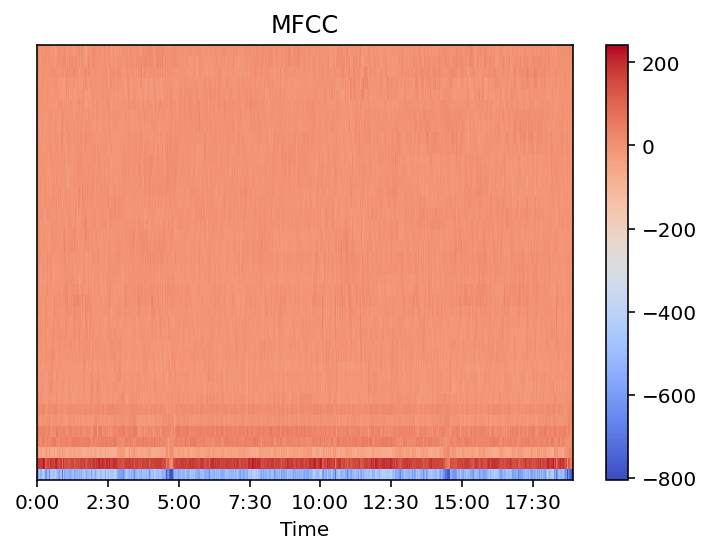

In [ ]:
y2, sr2 = lr.load(f"project/output.wav", sr=None, mono=True)
mfccs = lr.feature.mfcc(y=y2, sr=sr, n_mfcc=40)
fig = showmfcc(mfccs)
fig.show()

In [ ]:
display(IPython.display.Audio(y1, rate=sr1))


In [ ]:
display(IPython.display.Audio(y2, rate=sr))



In [ ]:
display(IPython.display.Audio(y1+y2, rate=sr2))


ValueError: ignored

In [ ]:
archive_root='/content/data'
archive_url='https://storage.googleapis.com/paustian_cs236/maestro-v3.0.0-2017-v1.zip'
archive_name='maestro-v3.0.0-2017-v1.zip'
!test -d {archive_root} || mkdir -p {archive_root}
!test -f {archive_root}/{archive_name} || ( cd {archive_root} && wget --no-cache "{archive_url}" ; )
!test -d {archive_root}/maestro-v3.0.0 && test -f {archive_root}/maestro-v3.0.0/maestro-v3.0.0.csv || ( cd {archive_root} && unzip -qo {archive_name} ; )

--2021-11-05 18:59:02--  https://storage.googleapis.com/paustian_cs236/maestro-v3.0.0-2017-v1.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.73.240, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9526890485 (8.9G) [application/zip]
Saving to: ‘maestro-v3.0.0-2017-v1.zip’

maestro-v3.0.0-2017 100%[===================>]   8.87G  95.0MB/s    in 78s     

2021-11-05 19:00:20 (117 MB/s) - ‘maestro-v3.0.0-2017-v1.zip’ saved [9526890485/9526890485]



In [ ]:
from dataclasses import dataclass, field
import numpy as np
from typing import List
import librosa
import pandas as pd
import music21 as m21
import warnings

# Alright, time to wrap this up....

# First, our data is stored like this [DATA_LOCATION]/[YEAR]/file.*
# and [DATA_LOCATION]/maestro-v3.0.0.csv has all relevant meta data


@dataclass
class MaestroDataConfig:
    root_dir: str = '/content/data/maestro-v3.0.0'
    meta_csv: str = 'maestro-v3.0.0.csv'
    seed: int = None
    subset: float = 1
    years: list = field(default_factory=list)
    midi_ticks_per_sec = 960
    midi_beats_per_min = 120
    sec_per_sample = [ 2, 5 ]
    sr = 44100
    n_fft=2048
    hop_length=1024         # sr / hop_length = resolution (MFCCs per sec,) 43
    win_length=1024
    n_mels=128              # number of samples per time step
    #n_mfcc=20
    power=2

class MaestroData:

    def __init__(self, config=MaestroDataConfig(), random_state=None):
        self.config = config
        self.random_state = np.random.RandomState(seed=self.config.seed)
        self.df = pd.read_csv(f"{self.config.root_dir}/{self.config.meta_csv}")
        self.df = self.df.sample(frac=1, random_state=self.random_state)
        if self.config.subset != 1.0:
            self.df = self.df.groupby(['year','split'], as_index=False).apply(lambda g: g.sample((int)(self.config.subset*len(g)), random_state=self.random_state))
        if self.config.years:
            self.df = self.df[self.df.year.isin(self.config.years)]
    def get_data(self, train=False, test=False, validation=False):
        dataset = np.array([train, test, validation]) != 0
        filter = np.array(['train', 'test', 'validation'])[dataset]
        records = data.df[data.df.split.isin(filter)]
        return records
    def load_mfccs(self, dr, offset_sec, duration_sec):
        wavfile = f"{self.config.root_dir}/{dr.audio_filename}"
        y, sr = librosa.load(wavfile, sr=self.config.sr, mono=True, offset=offset_sec, duration=duration_sec)
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=self.config.n_fft, hop_length=self.config.hop_length, win_length=self.config.win_length, n_mels=self.config.n_mels, power=self.config.power)
        #mel_spect = librosa.power_to_db(spect, ref=np.max) - should be included with power=2 above ...
        return mel_spect
    def create_midi_file(self, dr, offset_ticks, duration_ticks):
        events, remaining_ticks = self.load_midi_events(dr, offset_ticks, duration_ticks)
        events.insert(0, m21.midi.DeltaTime(track=None, time=0, channel=1))
        events.insert(1, m21.midi.MidiEvent(ntrack, type=m21.midi.ChannelVoiceMessages.PROGRAM_CHANGE, channel=1))
        events[1].parameter1 = 0
        events.append(m21.midi.DeltaTime(track=None, time=remaining_ticks, channel=1))
        events.append(m21.midi.MidiEvent(ntrack, type=m21.midi.MetaEvents.END_OF_TRACK))
        events[-1].data = b''

        sf = m21.midi.MidiFile()
        sf.format = 1
        sf.ticksPerQuarterNote = self.config.ticks_per_beat
        sf.ticksPerSecond = self.config.ticks_per_sec
        sf.tracks = [ ntrack ]
        sf.tracks[0].setChannel(1)
        sf.tracks[0].events = list(nsamples)
        sf.tracks[0].updateEvents()

        sf.open(f'project/sample.midi', 'wb')
        sf.write()
        sf.close()

    def load_midi_events(self, dr, offset_ticks, duration_ticks):
        midifile = f"{self.config.root_dir}/{dr.midi_filename}"
        mf = m21.midi.MidiFile()
        mf.open(midifile)
        mf.read()
        mf.close()

        ticks_end = int(offset_ticks + duration_ticks)
        ticks_curr, ticks_last_event = 0, int(offset_ticks)
        events = []

        for e in mf.tracks[1].events:
            if e.isDeltaTime():
                ticks_curr = ticks_curr + e.time
                if ticks_curr > ticks_end:
                    break
            else:
                assert e.time == 0 # assumptions ...
            if ticks_curr >= offset_ticks:
                if e.type == m21.midi.ChannelVoiceMessages.NOTE_ON:
                    # insert delta time
                    ne = m21.midi.DeltaTime(track=None, time=ticks_curr-ticks_last_event, channel=1)
                    events.append(ne)
                    # insert note on
                    ne = m21.midi.MidiEvent(track=None, type=m21.midi.ChannelVoiceMessages.NOTE_ON, time=0, channel=1)
                    ne.pitch = e.pitch
                    ne.velocity = e.velocity
                    ne.parameter1 = e.parameter1
                    ne.parameter2 = e.parameter2
                    events.append(ne)
                    ticks_last_event = ticks_curr
                elif e.isDeltaTime():
                    pass
                elif e.type == m21.midi.ChannelVoiceMessages.CONTROLLER_CHANGE and e.parameter1 in (64,67):
                    # pedals
                    pass
                elif e.type == m21.midi.ChannelVoiceMessages.PROGRAM_CHANGE and e.parameter1 in (0):
                    # pedals
                    pass
                else:
                    # assumptions ...
                    warnings.warn(f"unexpected event {e.type}, p1={e.parameter1}, p2={e.parameter2}, {e}")
                    
        return events, max(ticks_end - ticks_last_event, 0)

    def map_midi_events(self, events, remaining_ticks):
        new_events = []
        abs_time = 0
        for e in events:
            if e.isDeltaTime():
                if e.time < 0 or e.time >=60000:
                    print(f"Warning, unexpected event time value {e.time}, {e}")
                if e.time > 0:
                    new_events.append( min(abs_time, 59999) )
                abs_time = abs_time + e.time
            else:
                if e.velocity<0 or e.velocity>127:
                    print(f"Warning, unexpected event velocity value {e.velocity}, {e}")
                else:
                    new_events.append( 60000 + e.velocity )
                if e.pitch<0 or e.pitch>127:
                    print(f"Warning, unexpected event pitch value {e.pitch}, {e}")
                else:
                    new_events.append( 60128 + e.pitch )
        if remaining_ticks > 0:
            new_events.append(min(59999, remaining_ticks))
        new_events.append(0)
        return np.array(new_events)

    def sample_record(self, dr):
        duration_sec_range = np.array([self.config.sec_per_sample[0], min(self.config.sec_per_sample[1], dr.duration)])
        duration_sec = self.random_state.rand() * (duration_sec_range[1]-duration_sec_range[0]) + duration_sec_range[0]
        offset_sec = self.random_state.rand() * (dr.duration - duration_sec)
        return offset_sec, duration_sec

    def load_sample(self, dr, offset_sec, duration_sec):
        mfccs = self.load_mfccs(dr, offset_sec, duration_sec)
        events = self.load_midi_events(dr, offset_sec*self.config.midi_ticks_per_sec, duration_sec*self.config.midi_ticks_per_sec)
        events = self.map_midi_events(*events)
        return mfccs, events, (offset_sec, duration_sec)

config = MaestroDataConfig(years=[2017], seed=2021)
data = MaestroData(config)
records = data.get_data(train=True)
sample = data.sample_record(records.iloc[0])
d = data.load_sample(records.iloc[0], *sample)


In [ ]:
import torch

class MaestroDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
        self.records = data.get_data(train=True)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        d = data.load_sample(self.records.iloc[idx], *self.data.sample_record(self.records.iloc[idx]))
        return { 'mfcc' : d[0], 'midi' : d[1] }

    def __len__(self):
        return len(self.records)


In [ ]:
dset = MaestroDataset(data)

In [ ]:
#!pip install line_profiler
#%load_ext line_profiler
#%lprun -f MaestroData.load_midi_events data.load_sample(records.iloc[0], *sample)

https://arxiv.org/abs/2010.07061
